In [15]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

transactions_fpath = '../data/comscore/2017/transactions.csv'

In [37]:
# DC - had to run the following to convert to utf-8
!iconv -c ../data/comscore/2017/2017transactions.csv -t utf-8 -o ../data/comscore/2017/transactions.csv

In [38]:
tdf = pd.read_csv(transactions_fpath)

/opt/anaconda3/envs/floc-analysis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
transactions_df = pd.read_csv(transactions_fpath, parse_dates=['event_date'])
transactions_df.columns

Index(['machine_id', 'site_session_id', 'prod_category_id', 'prod_name',
       'domain_id', 'prod_qty', 'prod_totprice', 'basket_tot', 'event_date',
       'event_time', 'hoh_most_education', 'census_region', 'household_size',
       'hoh_oldest_age', 'household_income', 'children', 'racial_background',
       'connection_speed', 'country_of_origin', 'zip_code', 'domain_name'],
      dtype='object')

In [18]:
transactions_df = transactions_df[['machine_id', 
                 'household_income', 'racial_background', 
                 'country_of_origin', 'hoh_most_education',
                 'prod_category_id', 'prod_name',
                 'prod_qty', 'prod_totprice', 
                 'event_date',
                 'domain_name']]
transactions_df.drop('machine_id', axis=1).head()

,household_income,racial_background,country_of_origin,hoh_most_education,prod_category_id,prod_name,prod_qty,prod_totprice,event_date,domain_name
0,12,1,1,4,99,Entire home/apt,1.0,NaN,2017-02-24,NaN
1,13,5,0,2,99,Entire home/apt,1.0,NaN,2017-03-16,NaN
2,13,1,0,5,99,Entire home/apt,1.0,NaN,2017-02-16,NaN
3,11,3,1,3,99,Private room,1.0,NaN,2017-02-14,NaN
4,14,2,0,3,99,Entire home/apt,1.0,NaN,2017-02-02,NaN


## Time period

What is the time range of the data? When were transactions made?

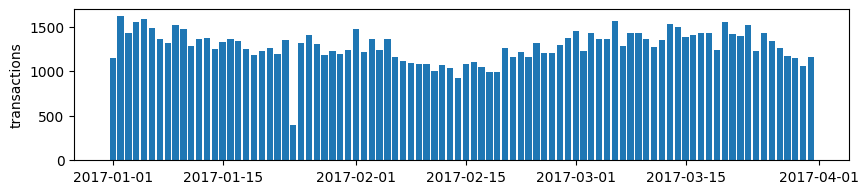

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10, 2), dpi=100)
transaction_dates = transactions_df.event_date.value_counts().sort_index()
ax.bar(transaction_dates.index, transaction_dates)
_ = ax.set_ylabel('transactions')

## Domain names

Most / many domains are unique in the dataset.

In [20]:
print(transactions_df['domain_name'].unique())

[nan 'verizonwireless.com' 'aa.com' 'southwest.com' 'ebay.com'
 'forever21.com' 'checksunlimited.com' 'target.com' 'sears.com'
 'zales.com' 'gap.com' 'bestbuy.com' 'chewy.com' 'visiondirect.com'
 'samsclub.com' 'proflowers.com' 'avenue.com' 'ticketweb.com'
 'tigerdirect.com' 'bhphotovideo.com' 'stubhub.com' 'disneystore.com'
 'norton.com' 'dominos.com' 'kayak.com' 'ticketliquidator.com' 'etsy.com'
 'avis.com' 'tirerack.com' 'vistaprint.com' 'vitacost.com'
 'womanwithin.com' 'peapod.com' 'hsn.com' 'ticketfly.com' 'mcafee.com'
 'dsw.com' 'nordstrom.com' 'rakuten.com' 'ihg.com' 'landsend.com'
 'ticketmaster.com' 'midnightvelvet.com' 'jjill.com' 'united.com'
 'walgreens.com' 'petco.com' 'homedepot.com' 'ups.com' 'zappos.com'
 'costcophotocenter.com' 'eastbay.com' 't-mobile.com' 'hp.com'
 'roamans.com' 'frys.com' 'quill.com' '1800flowers.com' 'kohls.com'
 'blair.com' 'carters.com' 'eddiebauer.com' '1800contacts.com' 'att.com'
 'bathandbodyworks.com' 'nike.com' 'footlocker.com' 'rei.com' 'ep

207 unique domains
transactions per domain


amazon.com              45693
ebay.com                13575
dominos.com              5037
walmart.com              4035
papajohns.com            2294
                        ...  
match.com                   1
ticketliquidator.com        1
intuit.com                  1
zales.com                   1
weightwatchers.com          1
Name: domain_name, Length: 207, dtype: int64

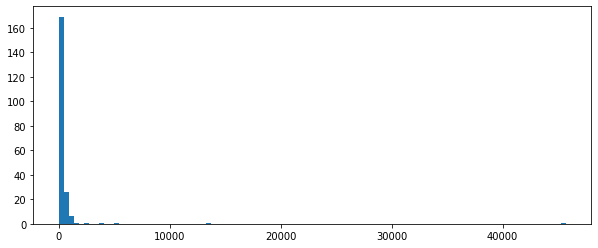

In [21]:
print('%s unique domains' % transactions_df['domain_name'].nunique())
print('transactions per domain')
fig,ax = plt.subplots(1,1, figsize=(10,4))
_ = ax.hist(transactions_df['domain_name'].value_counts().values, bins=100)
transactions_df['domain_name'].value_counts()

In [22]:
# What are the most popular domains?
D = 20
print('total transactions per domain -- %s most popular' % D)
transactions_df['domain_name'].value_counts().head(D)

total transactions per domain -- 20 most popular


amazon.com             45693
ebay.com               13575
dominos.com             5037
walmart.com             4035
papajohns.com           2294
kohls.com               1760
amway.com               1237
vistaprint.com          1228
jcpenney.com            1209
etsy.com                1138
aa.com                  1138
gap.com                  992
target.com               904
expedia.com              888
jetblue.com              883
victoriassecret.com      858
melaleuca.com            852
southwest.com            780
childrensplace.com       745
safeway.com              737
Name: domain_name, dtype: int64

In [23]:
# How many people / machine IDs per domain?
# note how ebay changes in order!
machines_per_domain = (
    transactions_df.groupby(['domain_name'])['machine_id']
    .nunique().sort_values(ascending=False)
)
machines_per_domain.head(D)

domain_name
amazon.com            9447
ebay.com              3059
walmart.com           1279
dominos.com           1261
papajohns.com          900
expedia.com            564
southwest.com          530
etsy.com               464
eventbrite.com         408
vistaprint.com         405
booking.com            400
walgreens.com          380
kohls.com              362
microsoftstore.com     332
groupon.com            329
jcpenney.com           319
aa.com                 306
target.com             298
hotels.com             296
norton.com             279
Name: machine_id, dtype: int64

machines per domain


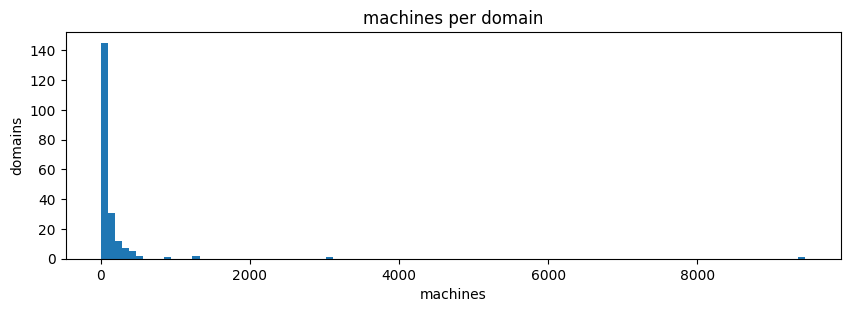

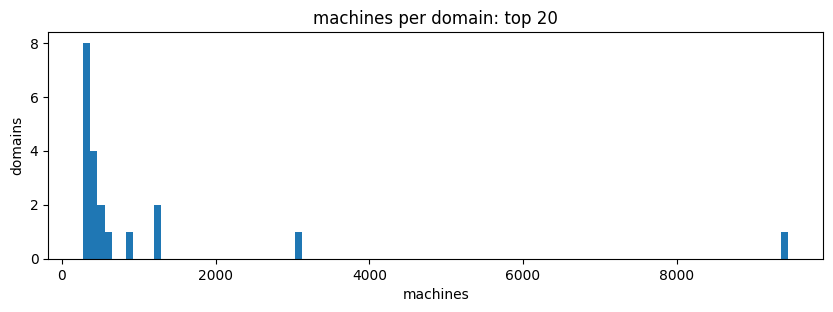

In [25]:
print('machines per domain')
fig,ax = plt.subplots(1,1, figsize=(10,3), dpi=100)
_ = ax.hist(machines_per_domain.values, bins=100)
ax.set_title('machines per domain')
ax.set_xlabel('machines')
_ = ax.set_ylabel('domains')

fig,ax = plt.subplots(1,1, figsize=(10,3), dpi=100)
_ = ax.hist(machines_per_domain.head(D).values, bins=100)
ax.set_title('machines per domain: top %s' % D)
ax.set_xlabel('machines')
_ = ax.set_ylabel('domains')

domain: amazon.com
186 unique product categories
41751 unique product names
transactions per product category ID


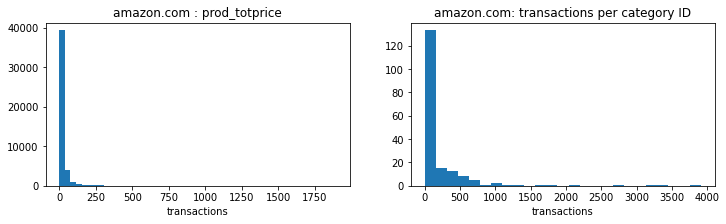

domain: ebay.com
127 unique product categories
13376 unique product names
transactions per product category ID


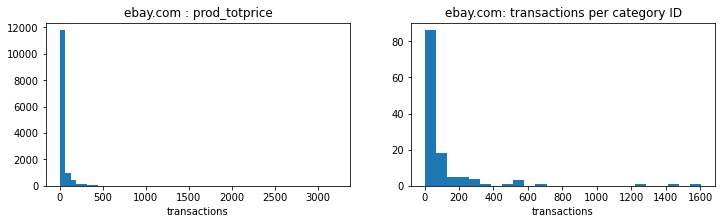

domain: walmart.com
177 unique product categories
3422 unique product names
transactions per product category ID


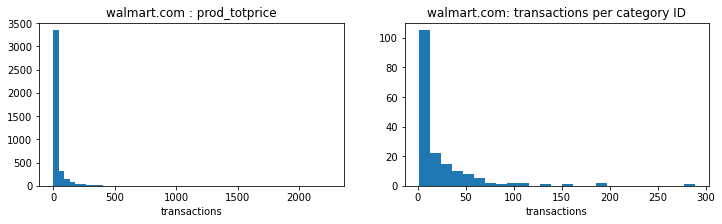

domain: dominos.com
1 unique product categories
9 unique product names
transactions per product category ID


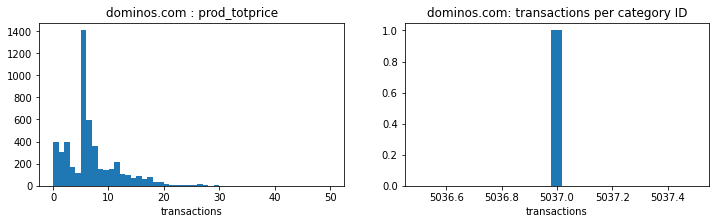

domain: papajohns.com
1 unique product categories
154 unique product names
transactions per product category ID


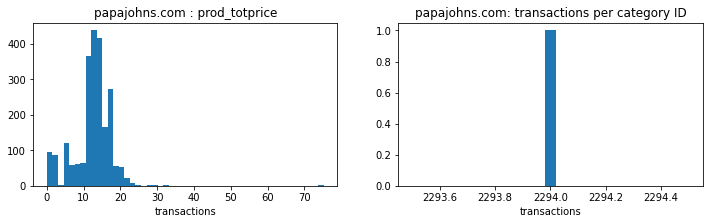

domain: expedia.com
5 unique product categories
550 unique product names
transactions per product category ID


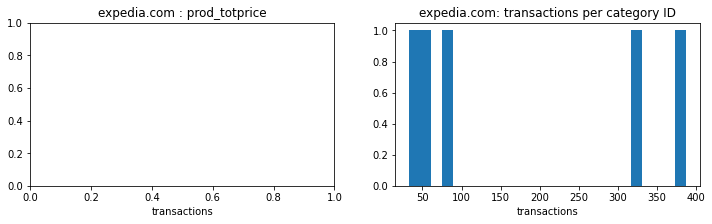

domain: southwest.com
2 unique product categories
6 unique product names
transactions per product category ID


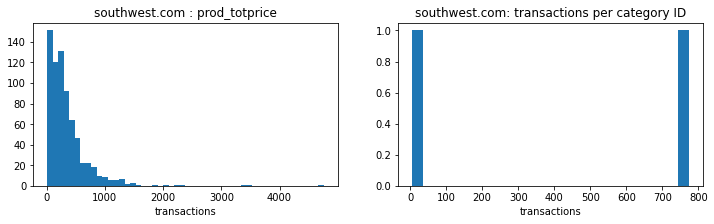

domain: etsy.com
57 unique product categories
1061 unique product names
transactions per product category ID


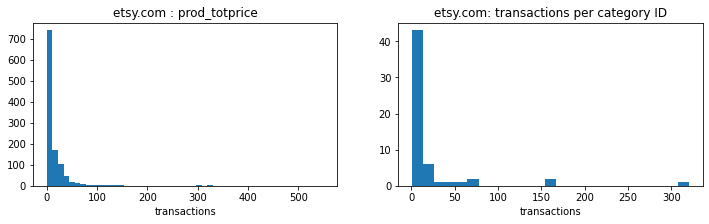

domain: eventbrite.com
2 unique product categories
544 unique product names
transactions per product category ID


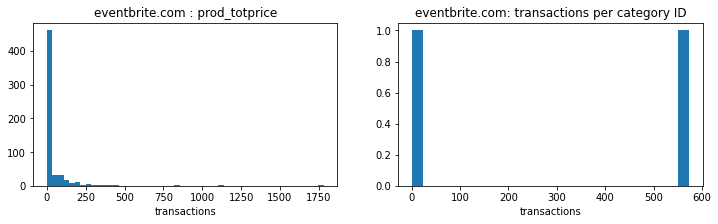

domain: vistaprint.com
21 unique product categories
152 unique product names
transactions per product category ID


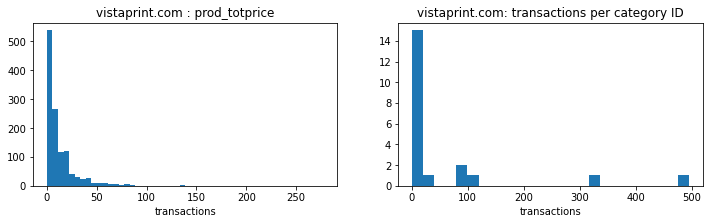

domain: booking.com
1 unique product categories
1 unique product names
transactions per product category ID


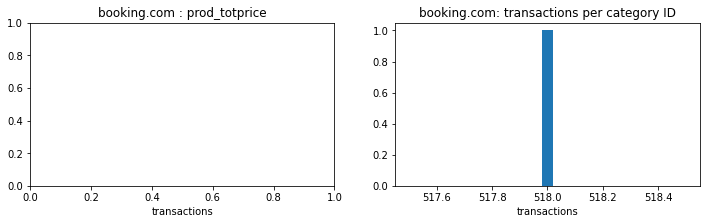

domain: walgreens.com
18 unique product categories
99 unique product names
transactions per product category ID


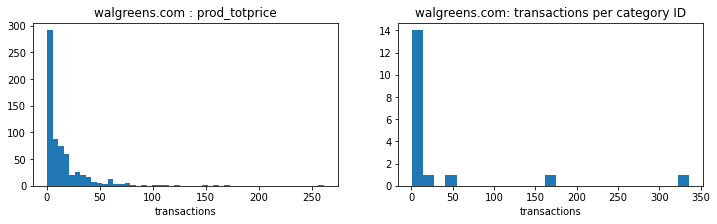

domain: kohls.com
65 unique product categories
1698 unique product names
transactions per product category ID


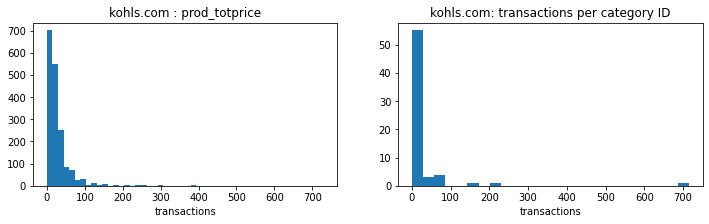

domain: microsoftstore.com
8 unique product categories
22 unique product names
transactions per product category ID


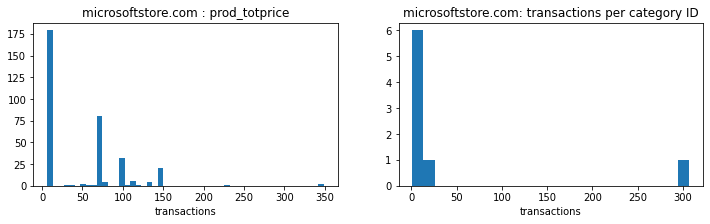

domain: groupon.com
2 unique product categories
495 unique product names
transactions per product category ID


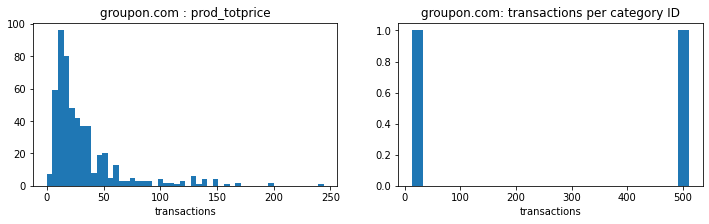

domain: jcpenney.com
31 unique product categories
1150 unique product names
transactions per product category ID


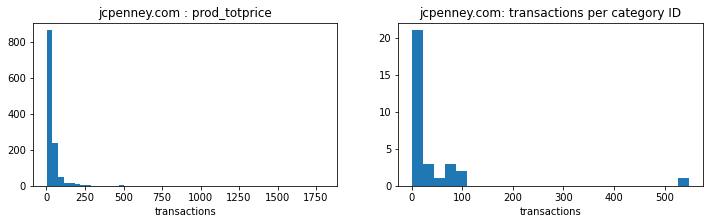

domain: aa.com
2 unique product categories
1067 unique product names
transactions per product category ID


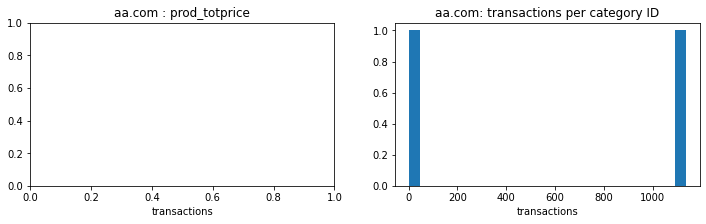

domain: target.com
90 unique product categories
866 unique product names
transactions per product category ID


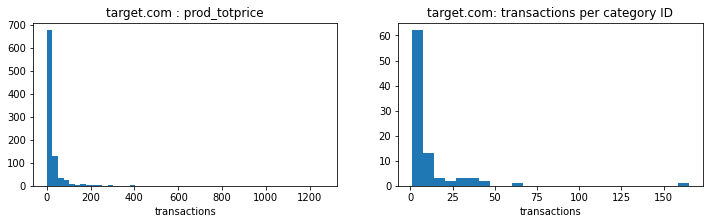

domain: hotels.com
1 unique product categories
170 unique product names
transactions per product category ID


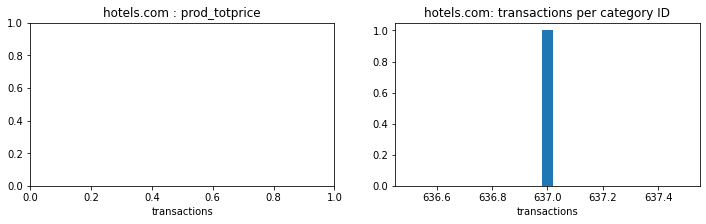

domain: norton.com
1 unique product categories
17 unique product names
transactions per product category ID


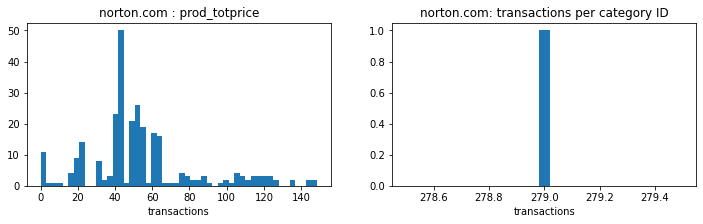

In [26]:
# Specifics per domain

# for the top D domains...
for i, domain in enumerate(machines_per_domain.index[:D]):
    d_transactions = transactions_df[transactions_df.domain_name==domain]
    fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
    print('domain:', domain)
    print('%s unique product categories'%d_transactions['prod_category_id'].nunique())
    print('%s unique product names'%d_transactions['prod_name'].nunique())
    if (d_transactions['prod_totprice'].nunique() > 1):
        _ = ax1.hist(d_transactions['prod_totprice'], bins=50)
    ax1.set_title('%s : prod_totprice' % domain)
    ax1.set_xlabel('transactions')
    print('transactions per product category ID')
    _ = ax2.hist(d_transactions['prod_category_id'].value_counts(), bins=25)
    ax2.set_xlabel('transactions')
    ax2.set_title('%s: transactions per category ID' % domain)
    plt.show()

## Products and prices

- What are the product categories and product names?

- What is the distribution of prices per product?

- How many machines and transactions per product?

Observation: Most product categories have just a few observations.

244 product category IDs


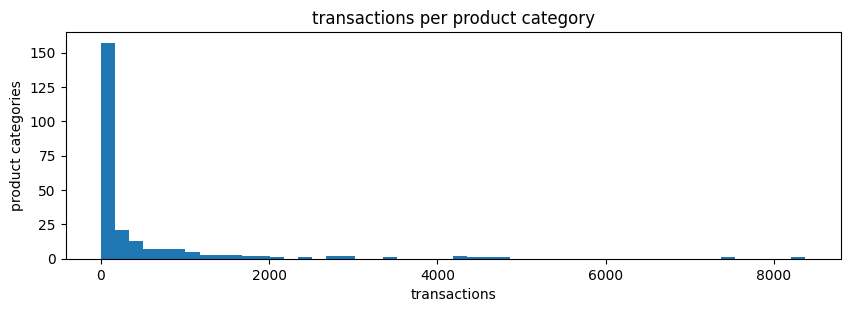

count     244.000000
mean      471.836066
std      1076.828806
min         1.000000
25%         8.750000
50%        73.500000
75%       361.000000
max      8375.000000
Name: prod_category_id, dtype: float64

In [27]:
# How many product categories and what are their frequencies?

print('%s product category IDs' % transactions_df['prod_category_id'].nunique())

fig,ax = plt.subplots(1,1,figsize=(10,3), dpi=100)
ax.set_title('transactions per product category')
_ = ax.hist(transactions_df['prod_category_id'].value_counts().values, bins=50)
_ = ax.set_xlabel('transactions')
_ = ax.set_ylabel('product categories')
plt.show()
transactions_df['prod_category_id'].value_counts().describe()

Nearly all product names are unique (in just one transaction).

88340 unique product names


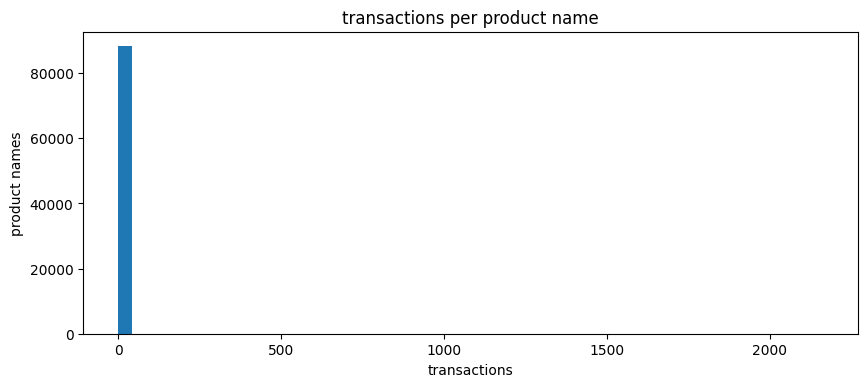

count    88340.000000
mean         1.294216
std          9.405285
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       2163.000000
Name: prod_name, dtype: float64


Pizza                                                                                                                                                                                                                           2163
Large Original Crust Cheese Pizza                                                                                                                                                                                                594
Hotel                                                                                                                                                                                                                            578
Sides                                                                                                                                                                                                                            543
Bread                                                                               

In [153]:
# What are the most common product names?
# What is their distribution frequency?
print('%s unique product names' % transactions_df['prod_name'].nunique())
fig,ax = plt.subplots(1,1,figsize=(10,4), dpi=100)
ax.set_title('transactions per product name')
_ = ax.hist(transactions_df['prod_name'].value_counts().values, bins=50)
_ = ax.set_xlabel('transactions')
_ = ax.set_ylabel('product names')
plt.show()
print(transactions_df['prod_name'].value_counts().describe())
transactions_df['prod_name'].value_counts()

product names per category ID
count     244.000000
mean      362.299180
std       852.678774
min         1.000000
25%         6.750000
50%        55.500000
75%       272.500000
max      7841.000000
Name: prod_name, dtype: float64


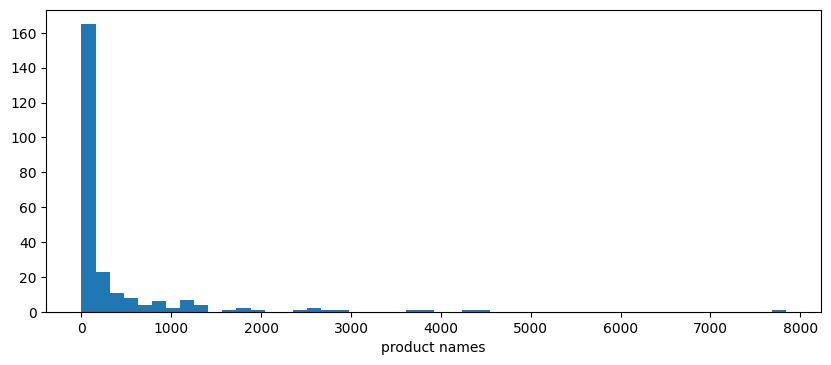

In [165]:
# What is the distribution of number of product names to categories?
print("product names per category ID")
prod_name_per_category = (
    transactions_df.groupby('prod_category_id')['prod_name']
    .nunique()
    .sort_values()
)
print(prod_name_per_category.describe())
fig,ax = plt.subplots(1,1,figsize=(10,4), dpi=100)
_ = ax.hist(prod_name_per_category.values, bins=50)
_ = ax.set_xlabel('product names')
plt.show()

What are the categories? 

What are their associated domains and product names?

What are the most popular categories? Least popular?

In [201]:
categories = transactions_df.groupby(
        ['prod_category_id', 'domain_name','prod_name']
)['machine_id'].count().rename('count').to_frame()
prod_transaction_counts = transactions_df['prod_category_id'].value_counts().to_dict()
categories['total count'] = categories.index.map(lambda x: prod_transaction_counts[x[0]])

print('least frequent categories')
categories.sort_values(['total count','prod_category_id']).head(20)

least frequent categories


,,,count,total count
prod_category_id,domain_name,prod_name,,
2003005067,walmart.com,The Official Scrabble Players Dictionary 37177624,1,1
3004011000,amazon.com,Onkyo DXC390 6 Disc CD Player B0000EZ1KK vty onica,1,1
3004012148,att.com,Apple iPhone 6s - 128GB - Space Gray,1,1
3004012149,walmart.com,BLU Energy X Plus E030u 8GB GSM Android Smartphone (Unlocked) 46641714,1,1
5006019211,toysrus.com,LEGO 3-Piece Toy Organizer Cubes Item#: 00000000,1,1
5006020000,ebay.com,1997 Nintendo 64 LodgeNet LN 6402 Hotel Motel Controller pcrecyclean...,1,1
6007022220,walmart.com,Xbox Live 3 Month Gold Membership 47547932,1,1
7008024097,safeway.com,Bob Evans Mashed Potatoes Sour Cream & Chives - 24 Oz,1,1
7008025106,amazon.com,JD Ultimate Dr.JDMed Arm Sling with soft padded shoulder strap B00IE4221E TheJD,1,1


In [341]:
# What are the most popular categories?
categories.sort_values([
    'total count',
    'prod_category_id', 
    #'domain_name', 
    'count'
], ascending=False).head(20)

count  \
prod_category_id domain_name     prod_name                                                   
1001001014       womanwithin.com Top, Perfect crewneck tee in soft cotton knit          10   
                 gap.com         First-Layer Fitted Cami Tunic for Women  oldnavy        7   
                                 Relaxed High-Neck Tank for Women  oldnavy               6   
                 womanwithin.com 3/4 sleeve tab-front blouse                             6   
                                 Perfect knit tunic shirt in pure cotton with sc...      6   
                 carters.com     3-Piece Little Jacket Set                               5   
                 eddiebauer.com  Women's Layering Cami - Solid i09 792 4978              5   
                 gap.com         Built-In Flex Drawstring Tapered-Leg Pants for ...      5   
                 vistaprint.com  Embroidered Women's Polos                               5   
                 eddiebauer.com  Women's Girl On The Go Cowl-Neck Top i09 792 5144       4   
                                 Women's Misty Sleeveless Hoodie i09 709 5041            4   
                 forever21.com   Dolphin Hem Mini Skirt                                  4   
                                 Longline Open-Front Cardigan                            4   
                 gap.com         Drawstring Jersey Shorts for Toddler  oldnavy           4   
                                 GapShield flat front shorts  gap                        4   
                                 Graphic Crew-Neck Tee for Girls  oldnavy                4   
                                 Mid-Rise Rockstar Skinny Jeans for Women  oldnavy       4   
                                 Printed Pintuck Swing Dress for Women  oldnavy          4   
                                 Uniform bermuda shorts  gap                             4   
                 nordstrom.com   Dorothy Perkins Bomber Jacket (Plus Size) 5322143       4   

                                                                                     total count  
prod_category_id domain_name     prod_name                                                        
1001001014       womanwithin.com Top, Perfect crewneck tee in soft cotton knit              8375  
                 gap.com         First-Layer Fitted Cami Tunic for Women  oldnavy           8375  
                                 Relaxed High-Neck Tank for Women  oldnavy                  8375  
                 womanwithin.com 3/4 sleeve tab-front blouse                                8375  
                                 Perfect knit tunic shirt in pure cotton with sc...         8375  
                 carters.com     3-Piece Little Jacket Set                                  8375  
                 eddiebauer.com  Women's Layering Cami - Solid i09 792 4978                 8375  
                 gap.com         Built-In Flex Drawstring Tapered-Leg Pants for ...         8375  
                 vistaprint.com  Embroidered Women's Polos                                  8375  
                 eddiebauer.com  Women's Girl On The Go Cowl-Neck Top i09 792 5144          8375  
                                 Women's Misty Sleeveless Hoodie i09 709 5041               8375  
                 forever21.com   Dolphin Hem Mini Skirt                                     8375  
                                 Longline Open-Front Cardigan                               8375  
                 gap.com         Drawstring Jersey Shorts for Toddler  oldnavy              8375  
                                 GapShield flat front shorts  gap                           8375  
                                 Graphic Crew-Neck Tee for Girls  oldnavy                   8375  
                                 Mid-Rise Rockstar Skinny Jeans for Women  oldnavy          8375  
                                 Printed Pintuck Swing Dress for Women  oldnavy             8375  
                                 Uni

In [208]:
# What are the most popular category names?
categories.sort_values(
    ['count','prod_category_id',], 
    ascending=False
).head(20)

count  \
prod_category_id domain_name    prod_name                                        
7008024233       dominos.com    Pizza                                     2163   
                 papajohns.com  Large Original Crust Cheese Pizza          594   
                 dominos.com    Sides                                      543   
44               booking.com    Hotel                                      518   
7008024233       dominos.com    Bread                                      472   
                                Wings                                      469   
                                Drinks                                     446   
10015046238      usps.com       Print Shipping Labels                      438   
10014045235      vistaprint.com Website Coupon                             371   
44               hotels.com     Hotel hotels.com                           356   
7008024233       dominos.com    Dessert                                    335   
45               enterprise.com Car                                        287   
7008024233       dominos.com    Pasta                                      256   
16013043232      netflix.com    Unlimited Streaming Unlimited Streaming    244   
7008024233       dominos.com    Sandwich                                   242   
43               united.com     flight united                              215   
4005015159       vistaprint.com Standard Business Cards                    209   
10014044234      walgreens.com  4x6 Print(s)                               197   
7008024233       papajohns.com  Medium Original Crust Cheese Pizza         180   
43               delta.com      Main Cabin Flight delta                    166   

                                                                         total count  
prod_category_id domain_name    prod_name                                             
7008024233       dominos.com    Pizza                                           7460  
                 papajohns.com  Large Original Crust Cheese Pizza               7460  
                 dominos.com    Sides                                           7460  
44               booking.com    Hotel                                           2956  
7008024233       dominos.com    Bread                                           7460  
                                Wings                                           7460  
                                Drinks                                          7460  
10015046238      usps.com       Print Shipping Labels                            741  
10014045235      vistaprint.com Website Coupon                                   705  
44               hotels.com     Hotel hotels.com                                2956  
7008024233       dominos.com    Dessert                                         7460  
45               enterprise.com Car                                             1073  
7008024233       dominos.com    Pasta                                           7460  
16013043232      netflix.com    Unlimited Streaming Unlimited Streaming          261  
7008024233       dominos.com    Sandwich                                        7460  
43               united.com     flight united                                   4275  
4005015159       vistaprint.com Standard Business Cards                         1679  
10014044234      walgreens.com  4x6 Print(s)                                     711  
7008024233       papajohns.com  Medium Original Crust Cheese Pizza              7460  
43               delta.com      Main Cabin Flight delta                         4275

What is the relationship between categories and domains?

How many domain names per category?

How many categories per domain name?

In [342]:
categories_domain = transactions_df.groupby(
    ['prod_category_id','domain_name']
)['machine_id'].count().rename('transactions').to_frame()
print('sorted by category')
print(categories_domain.sort_values(by=['prod_category_id','transactions']).head(50))
print(categories_domain.sort_values(by=['prod_category_id','transactions'], ascending=False).head(50))

sorted by category
                                     transactions
prod_category_id domain_name                     
43               kayak.com                     11
                 hotwire.com                   15
                 cheaptickets.com              24
                 priceline.com                 27
                 orbitz.com                    95
                 travelocity.com              100
                 alaskaair.com                132
                 delta.com                    238
                 spirit.com                   240
                 united.com                   270
                 expedia.com                  330
                 southwest.com                774
                 jetblue.com                  883
                 aa.com                      1136
44               cheaptickets.com               2
                 kayak.com                      4
                 hotwire.com                    8
                 starwoodhotels

domains per category
count    244.000000
mean      10.762295
std       14.618075
min        1.000000
25%        2.000000
50%        5.000000
75%       13.000000
max      111.000000
Name: domain_name, dtype: float64


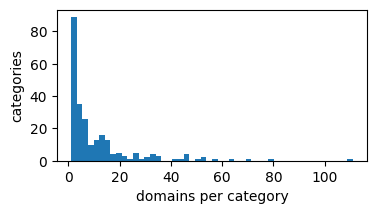

In [343]:
# How many domains per category?

print('domains per category')
domains_per_category = transactions_df.groupby('prod_category_id')['domain_name'].nunique()
print(domains_per_category.describe())
fig,ax=plt.subplots(1,1,figsize=(4,2), dpi=100)
_ = ax.hist(domains_per_category, bins=50)
ax.set_xlabel('domains per category')
_ = ax.set_ylabel('categories')

There are many domains with just one category.

categories per domain
count    207.000000
mean      12.685990
std       23.267398
min        1.000000
25%        1.000000
50%        5.000000
75%       14.000000
max      186.000000
Name: prod_category_id, dtype: float64


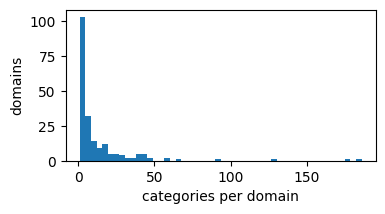

domain_name
1800contacts.com        1
greyhound.com           1
spirit.com              1
starwoodhotels.com      1
stubhub.com             1
                     ... 
kohls.com              65
target.com             90
ebay.com              127
walmart.com           177
amazon.com            186
Name: prod_category_id, Length: 207, dtype: int64

In [344]:
# How many categories per domain?

print('categories per domain')
categories_per_domain = transactions_df.groupby(
    'domain_name'
)['prod_category_id'].nunique().sort_values()
print(categories_per_domain.describe())
fig,ax=plt.subplots(1,1,figsize=(4,2), dpi=100)
_ = ax.hist(categories_per_domain, bins=50)
ax.set_xlabel('categories per domain')
ax.set_ylabel('domains')
plt.show()
categories_per_domain

Is there a broad distribution in the amount spent per category?

prices per categories


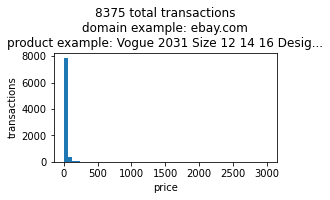

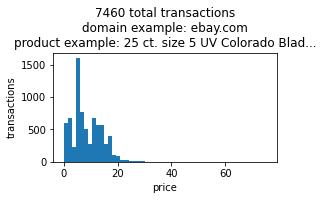

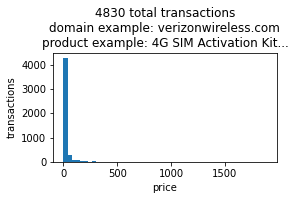

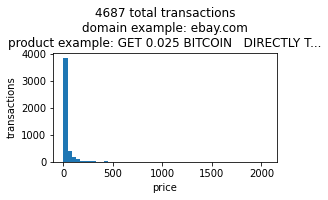

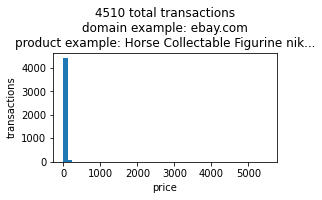

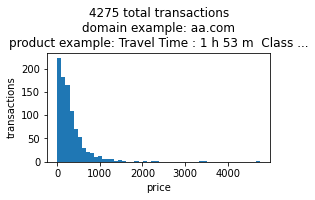

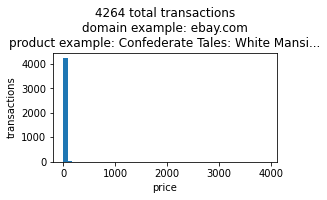

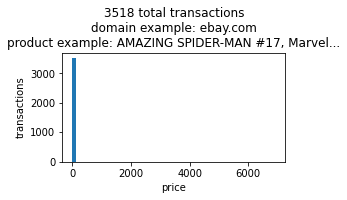

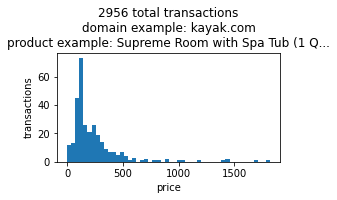

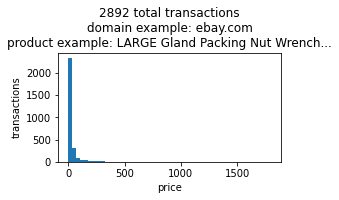

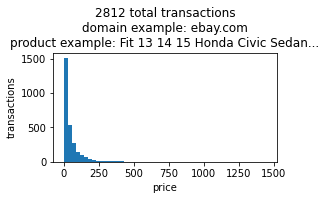

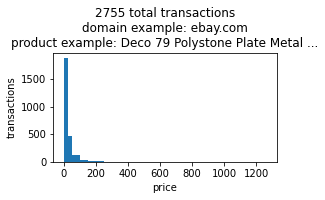

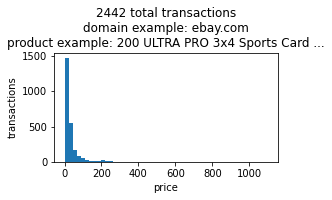

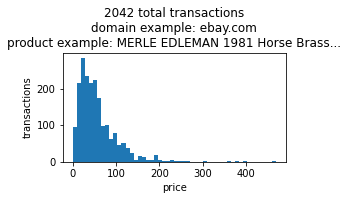

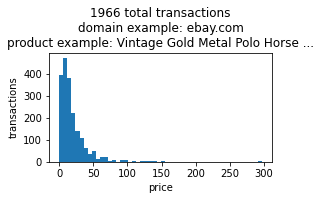

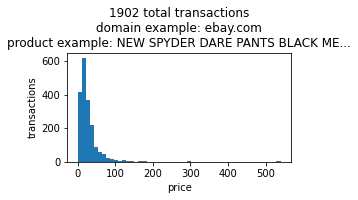

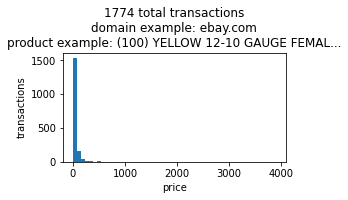

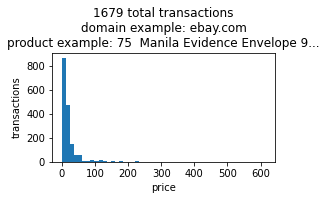

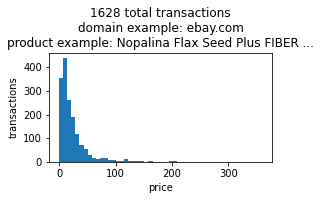

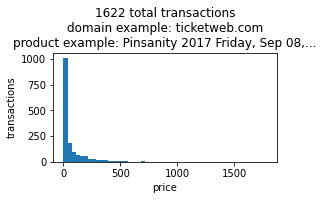

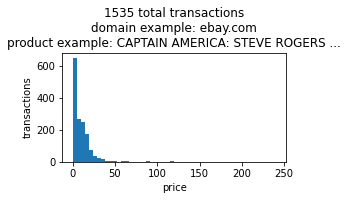

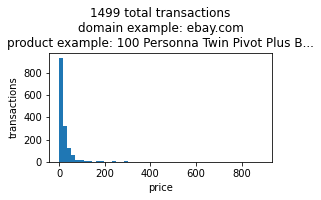

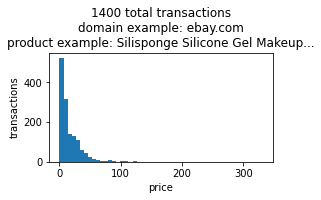

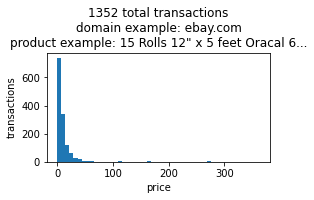

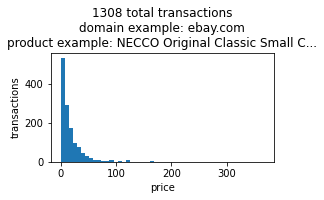

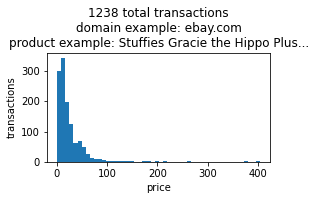

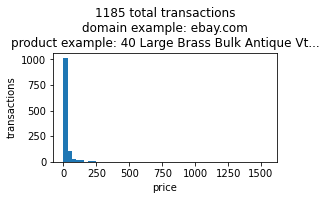

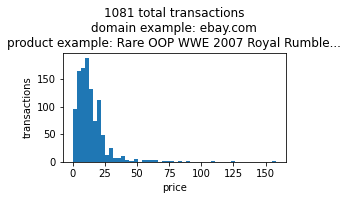

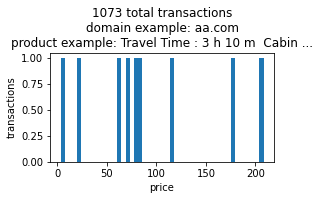

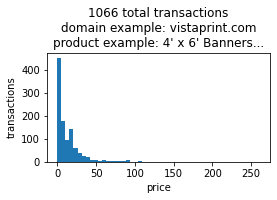

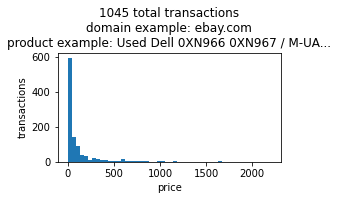

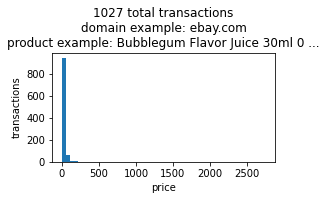

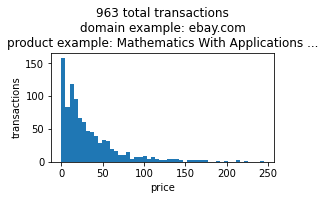

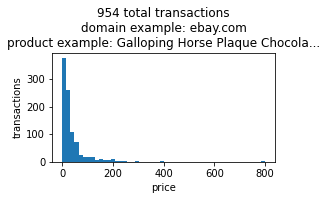

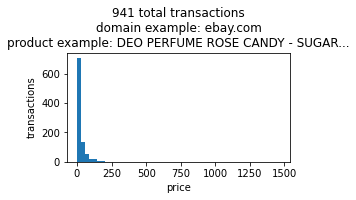

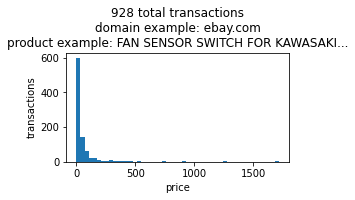

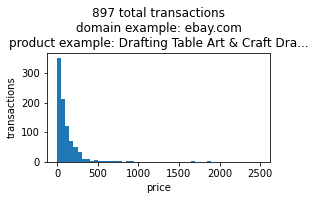

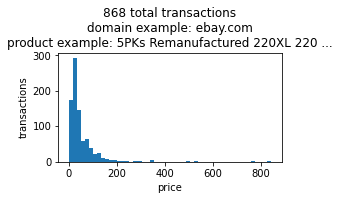

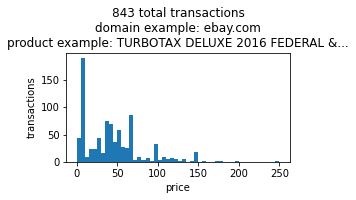

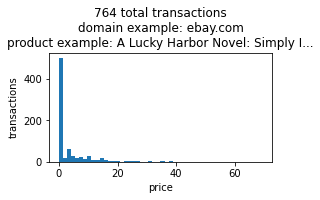

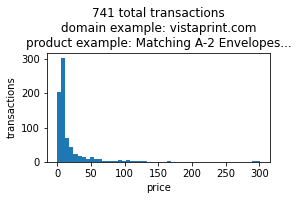

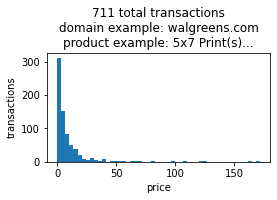

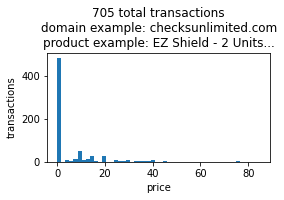

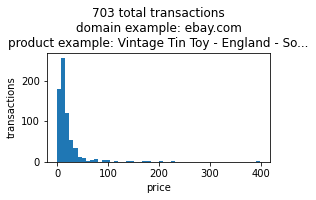

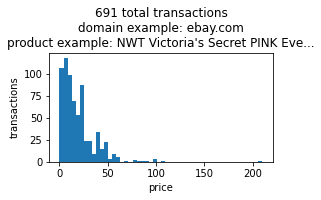

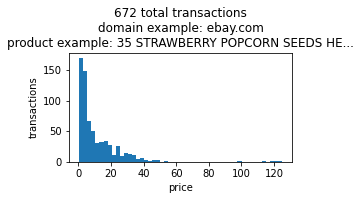

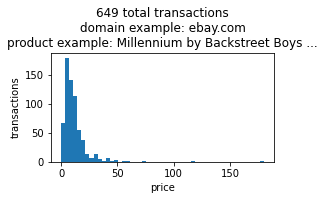

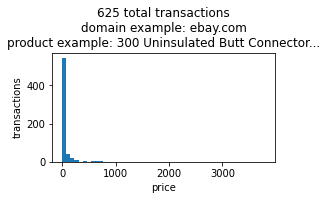

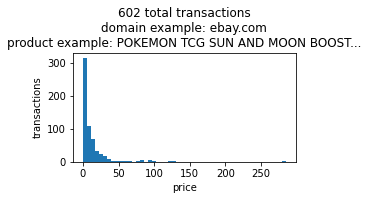

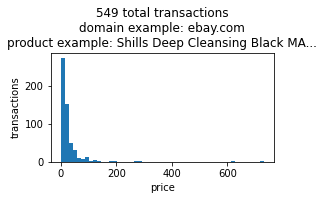

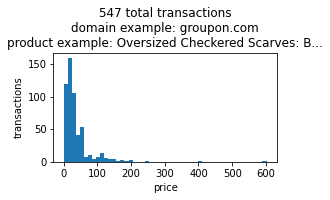

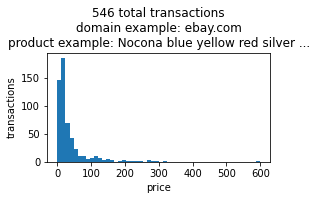

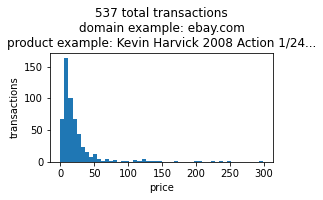

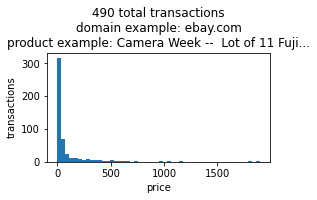

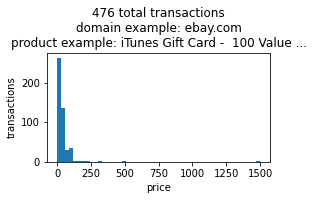

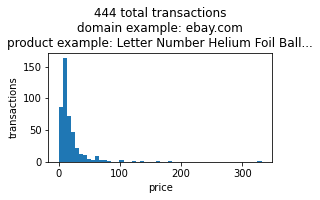

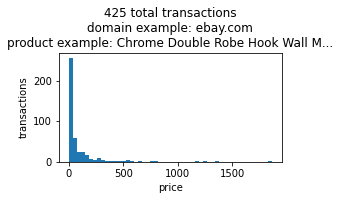

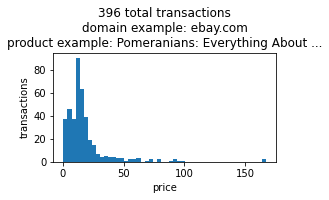

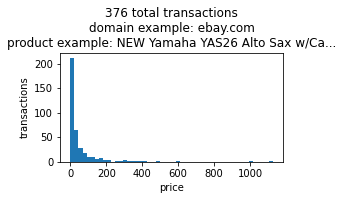

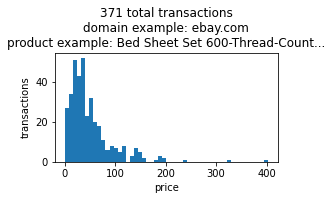

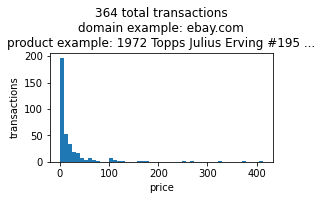

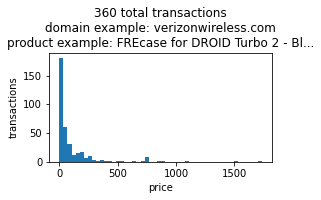

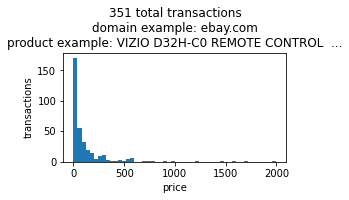

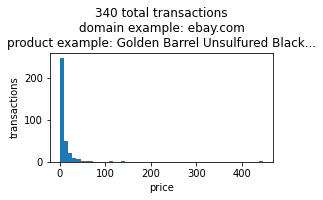

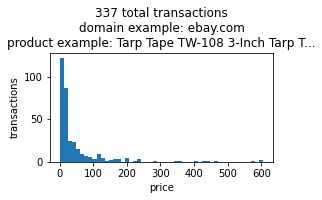

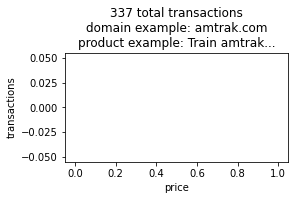

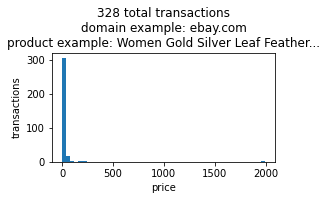

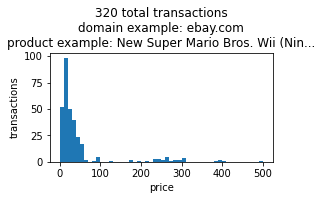

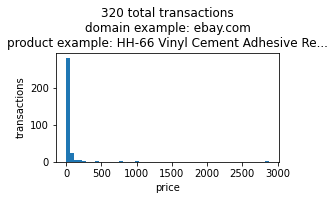

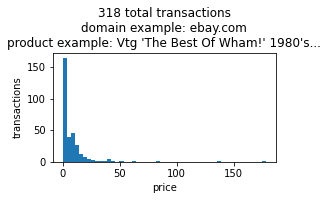

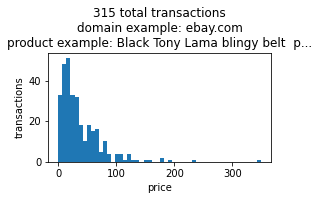

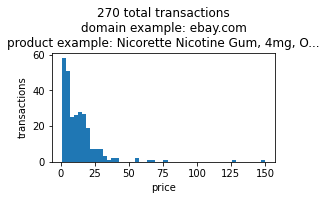

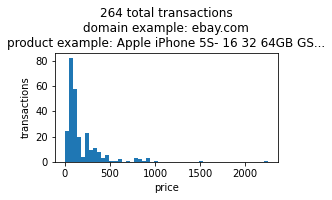

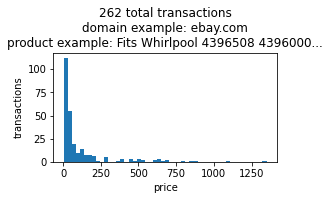

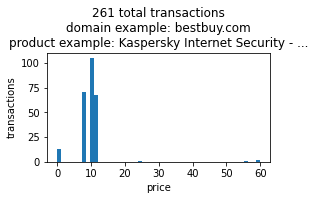

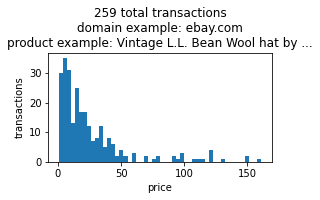

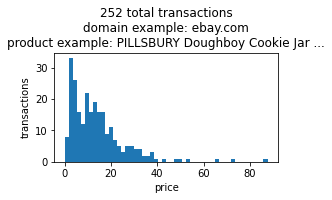

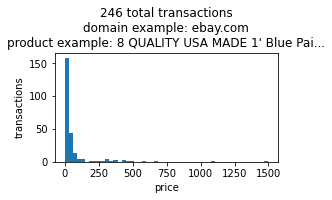

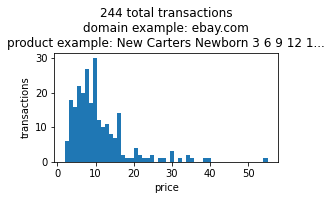

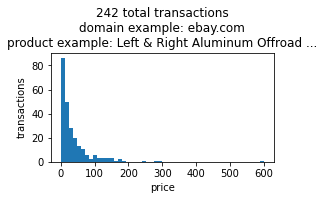

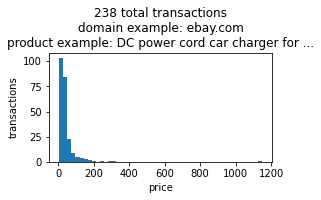

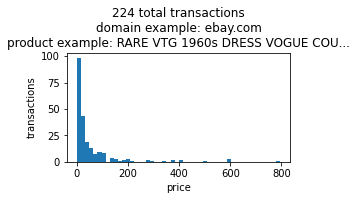

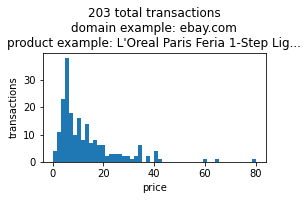

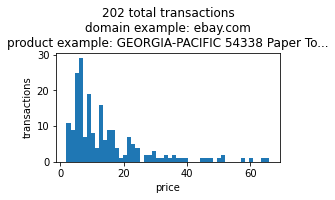

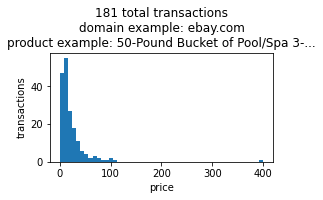

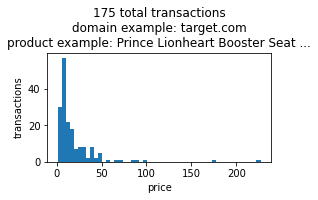

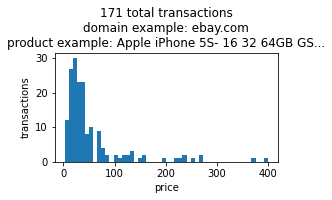

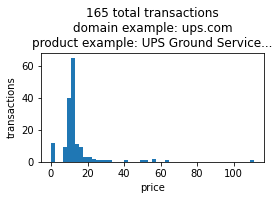

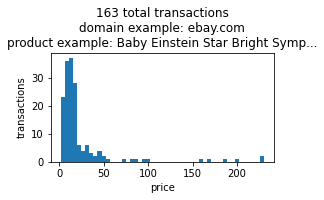

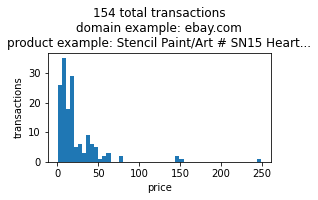

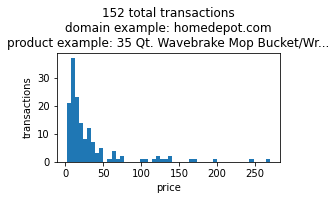

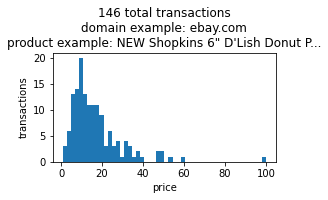

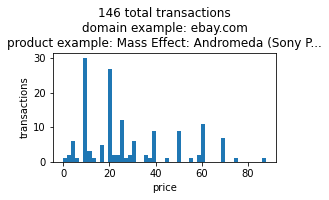

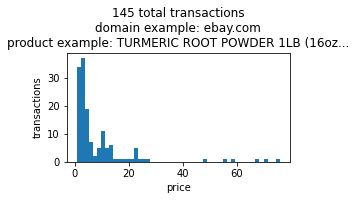

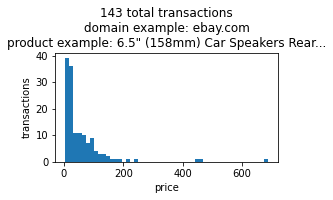

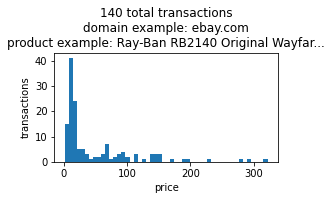

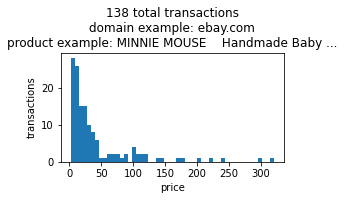

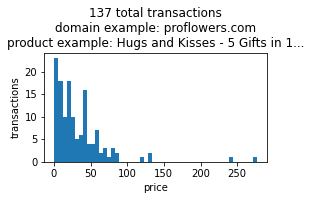

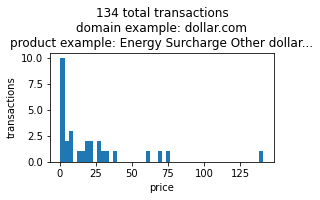

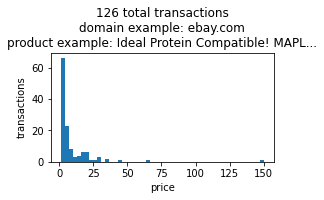

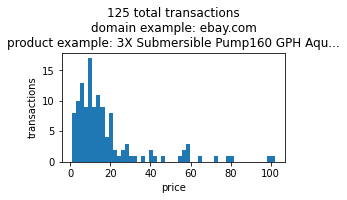

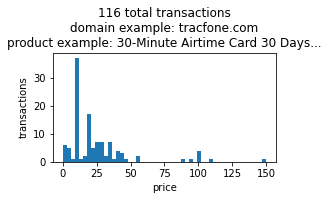

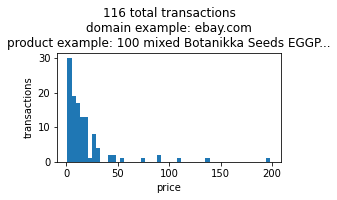

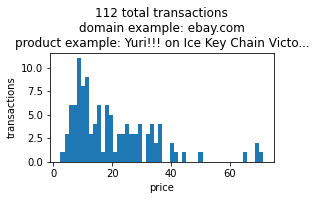

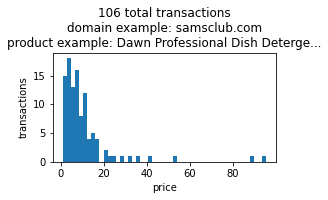

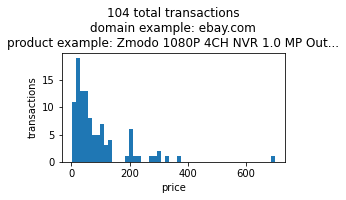

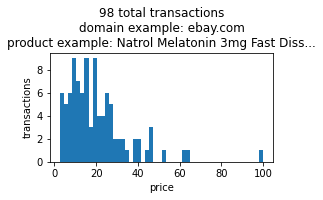

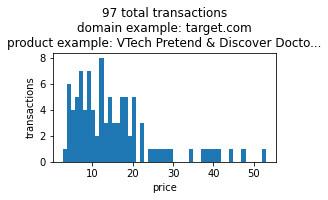

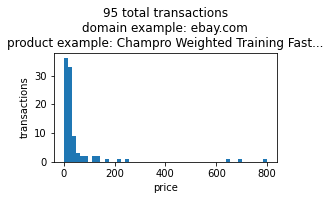

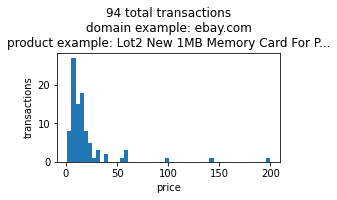

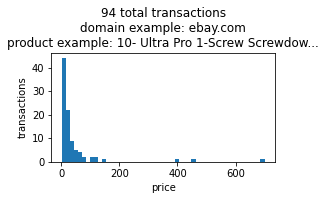

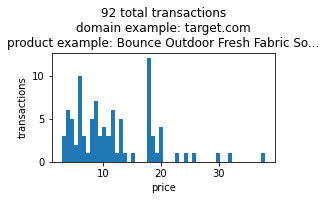

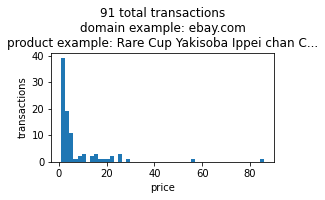

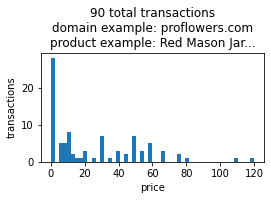

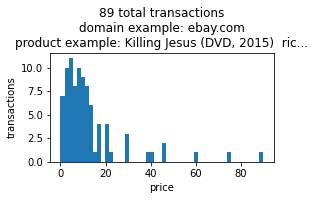

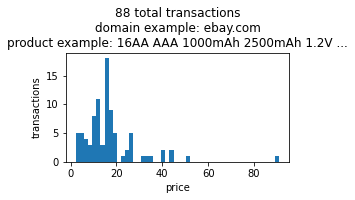

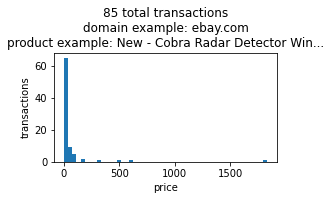

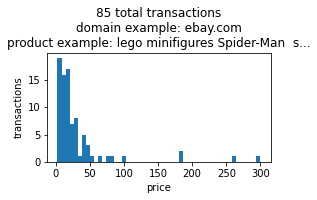

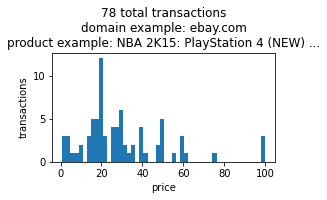

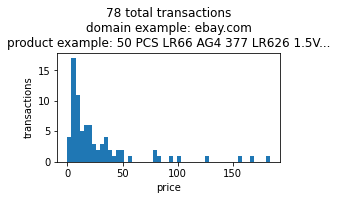

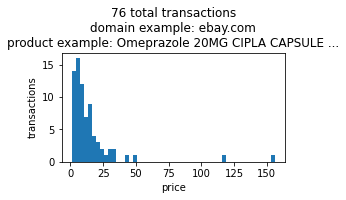

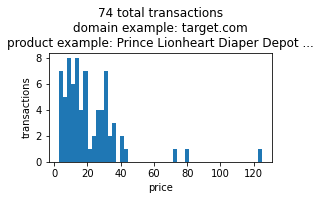

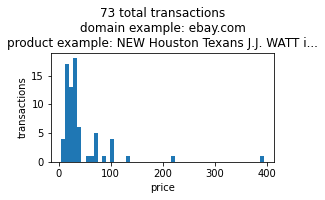

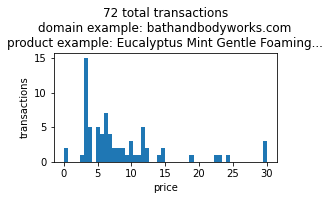

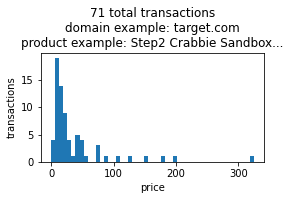

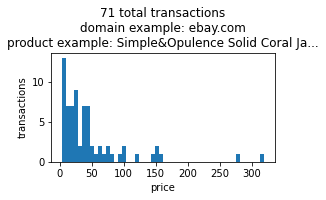

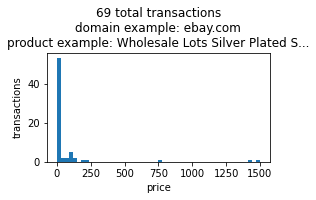

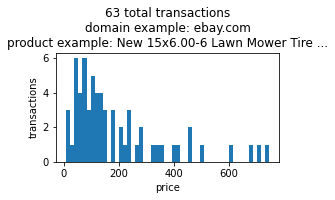

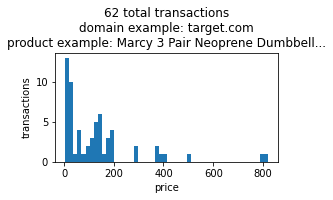

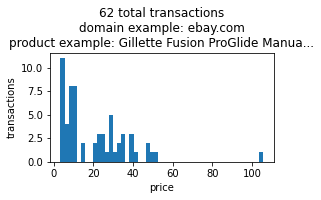

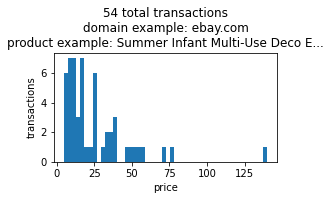

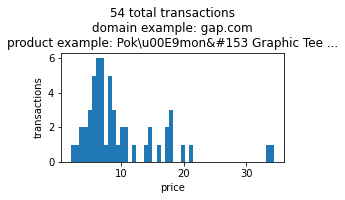

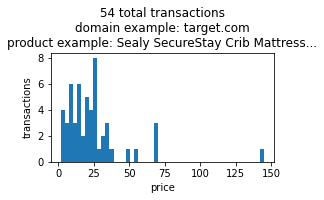

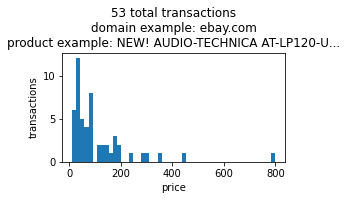

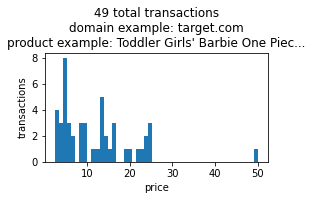

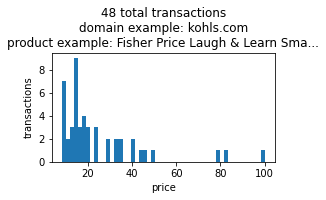

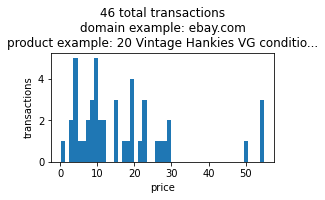

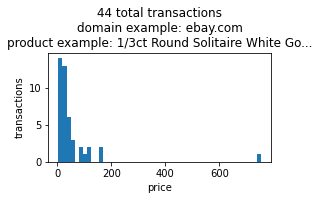

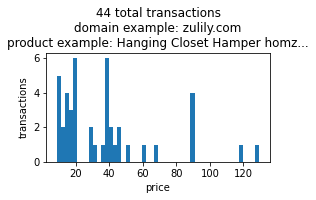

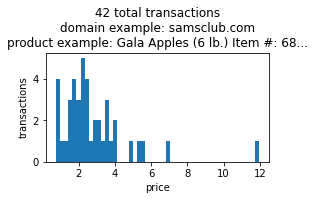

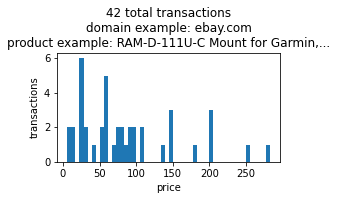

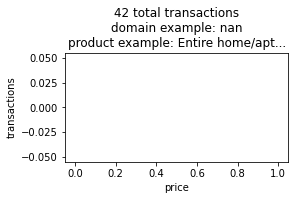

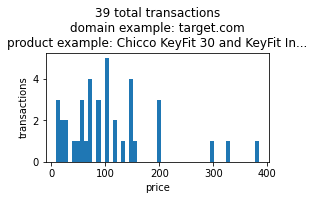

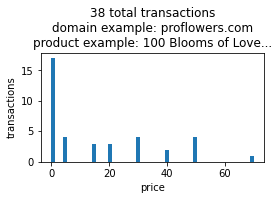

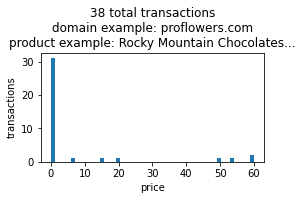

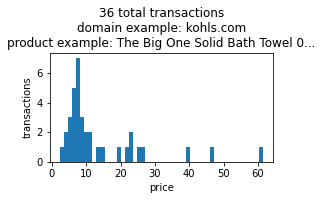

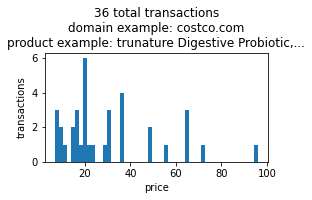

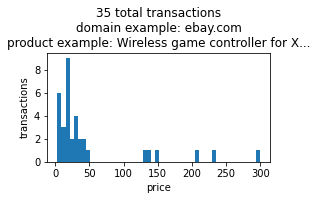

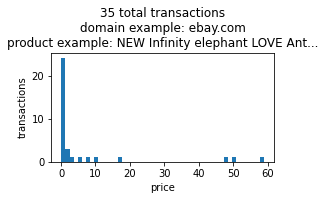

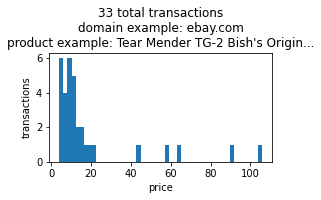

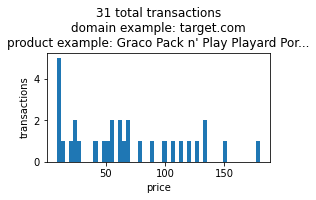

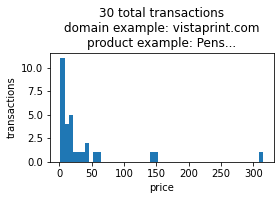

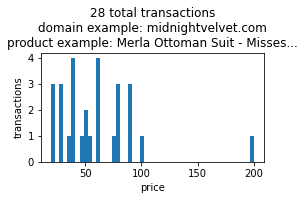

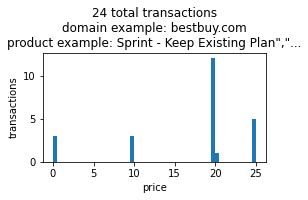

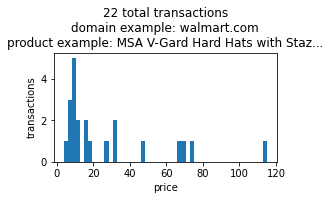

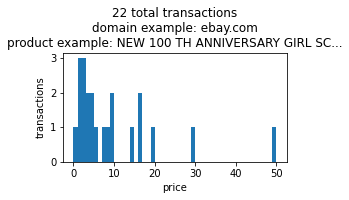

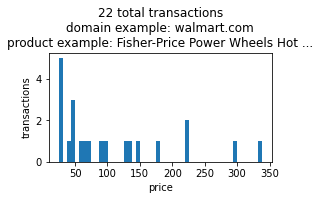

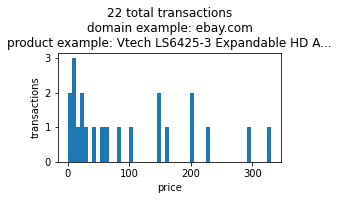

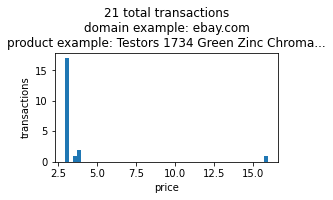

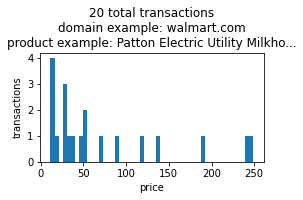

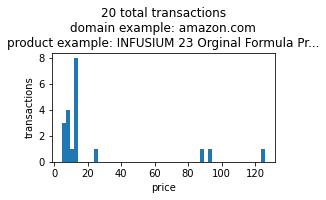

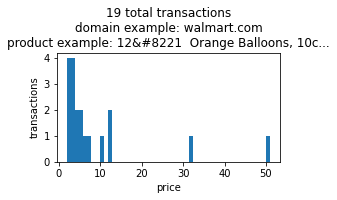

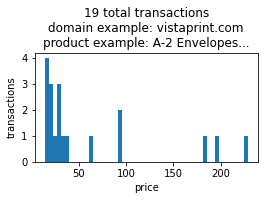

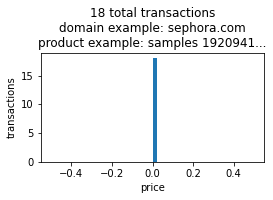

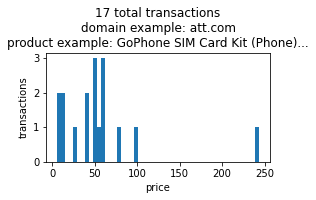

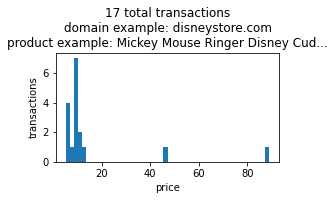

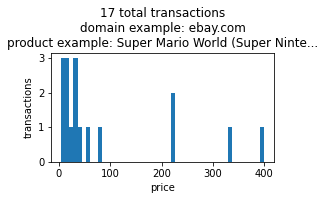

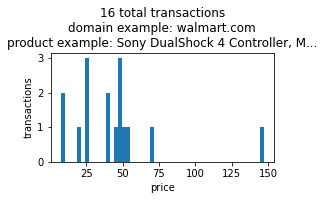

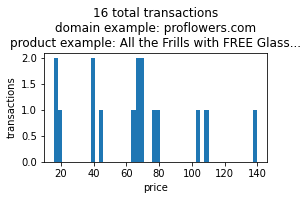

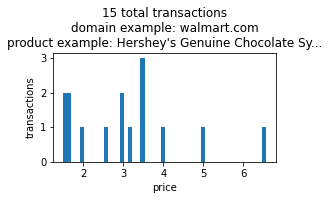

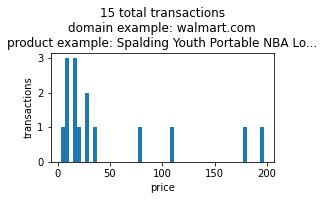

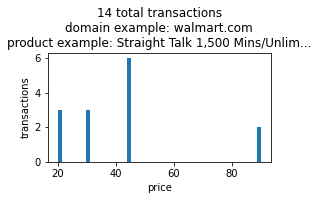

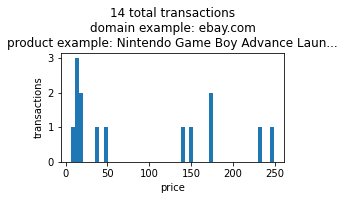

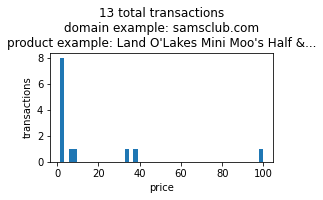

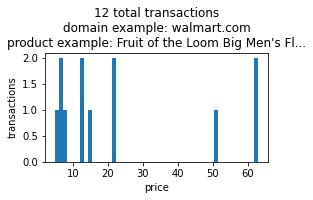

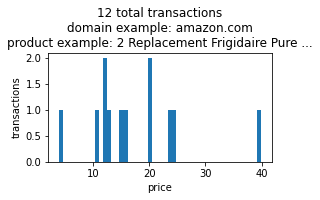

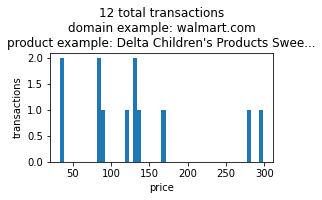

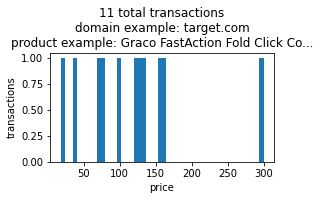

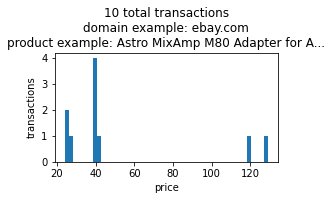

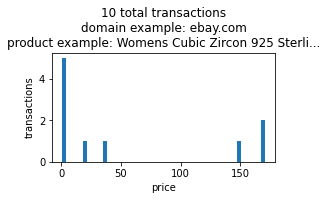

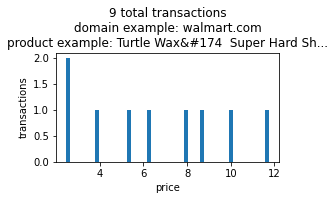

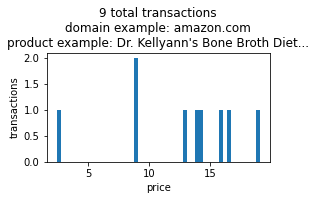

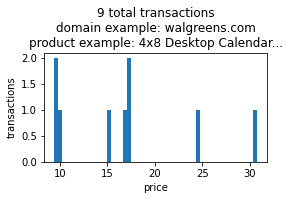

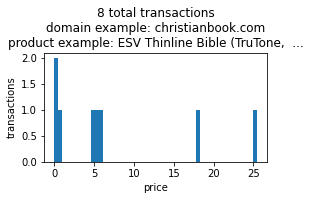

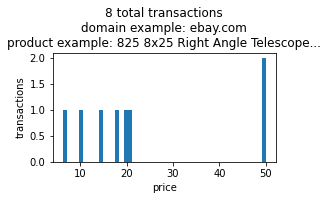

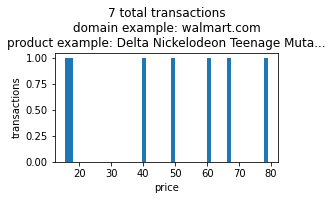

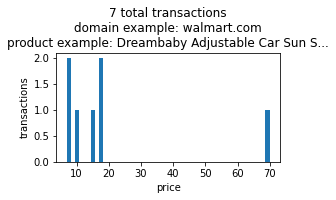

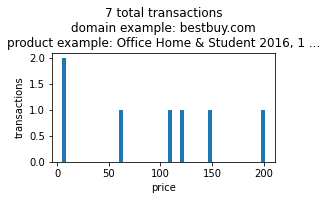

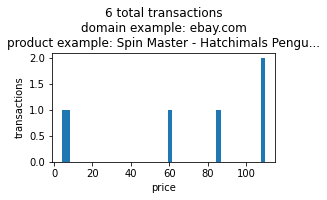

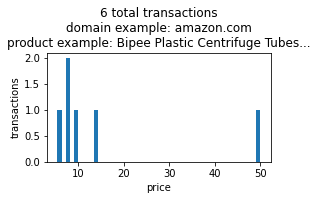

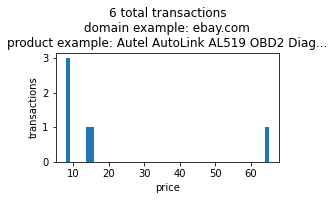

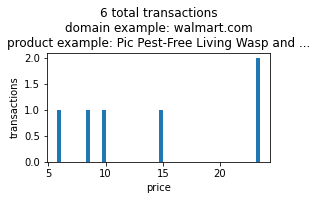

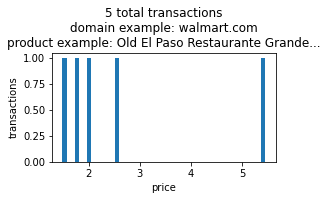

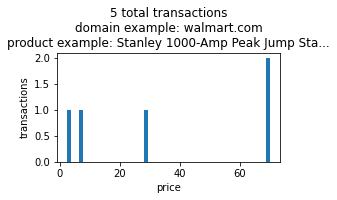

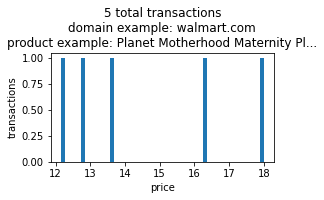

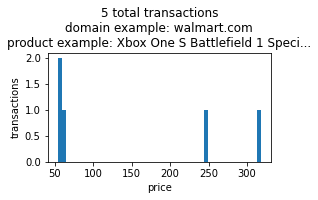

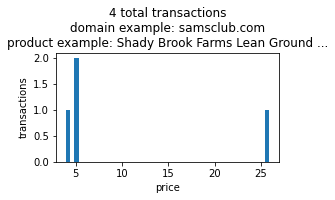

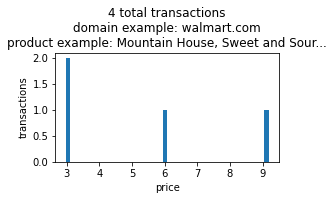

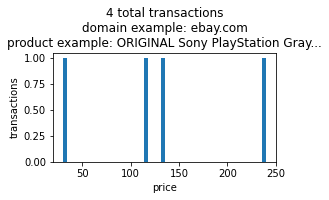

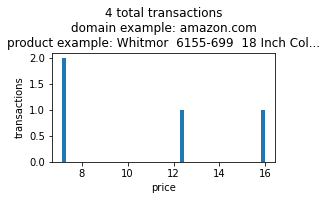

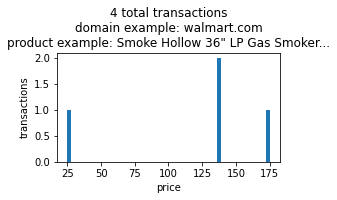

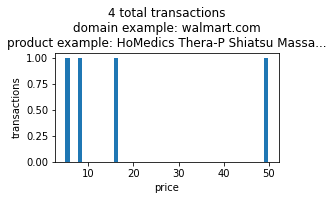

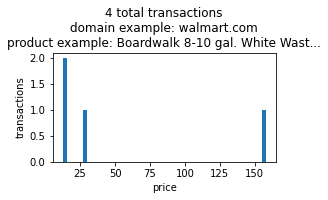

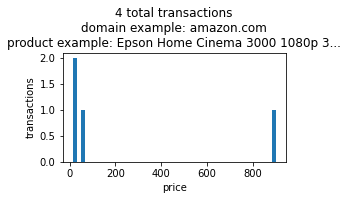

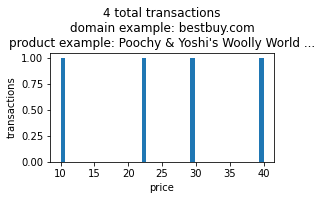

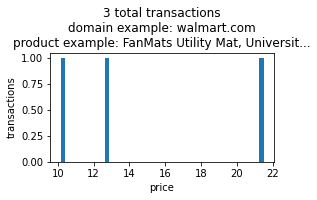

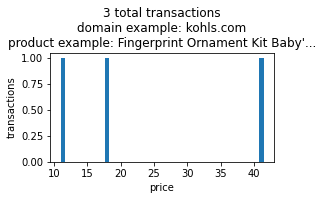

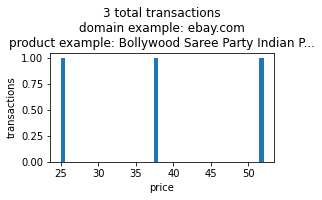

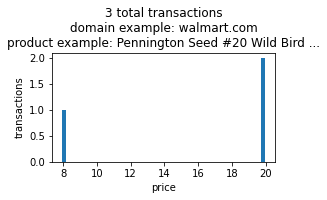

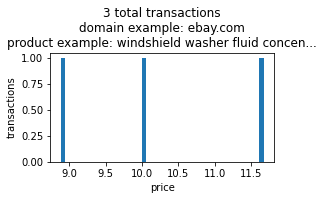

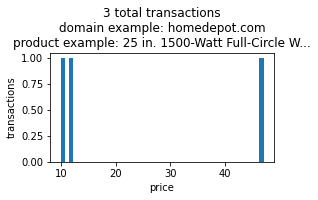

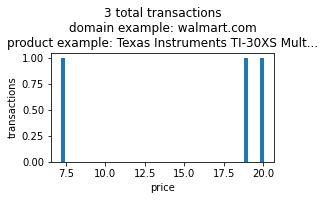

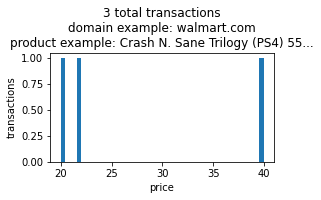

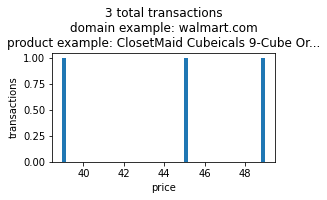

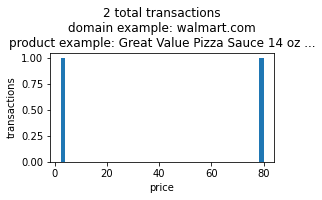

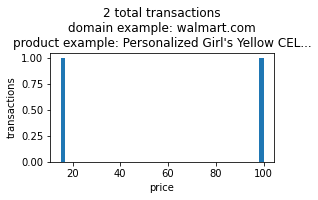

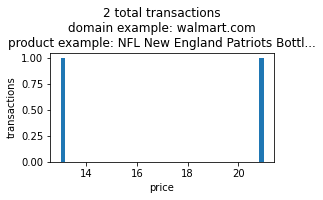

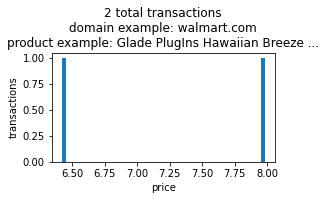

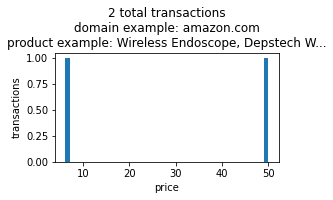

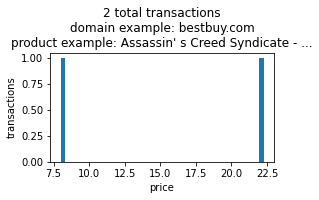

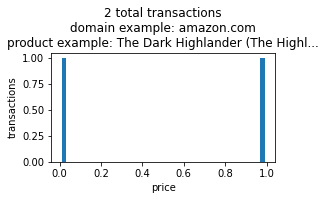

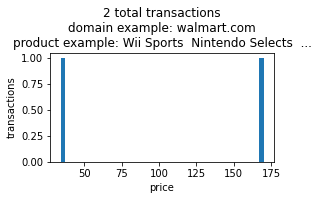

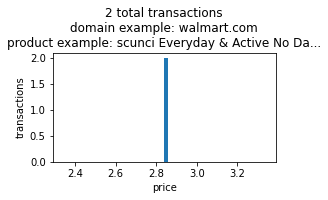

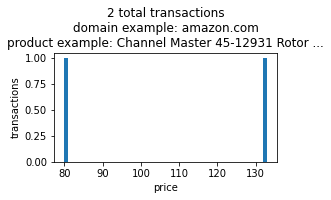

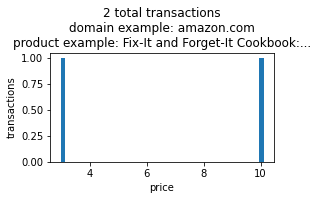

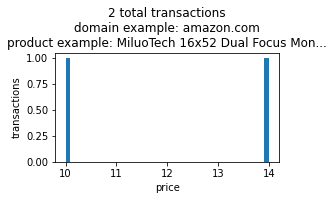

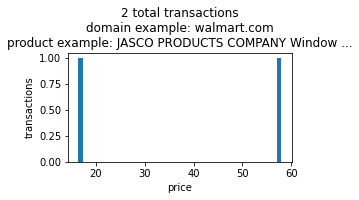

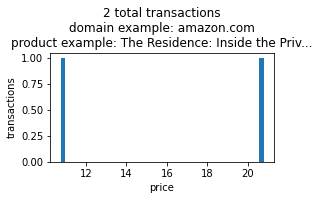

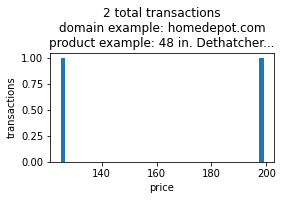

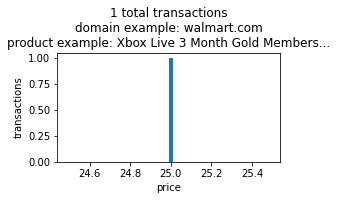

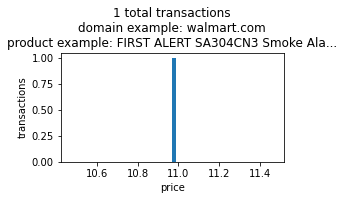

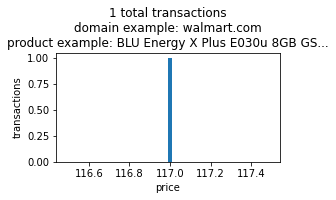

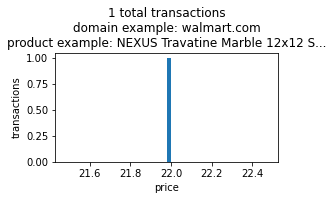

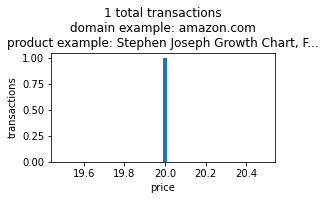

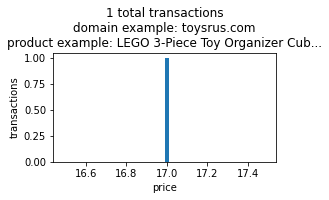

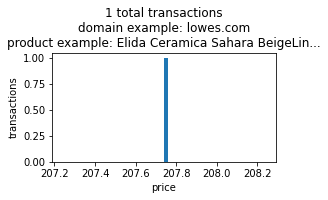

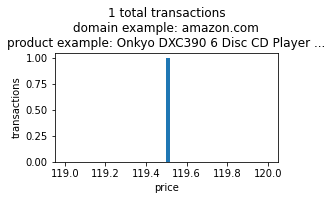

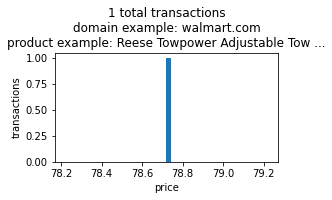

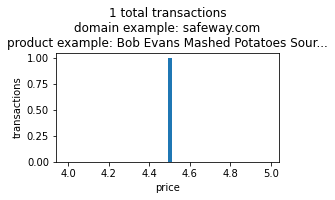

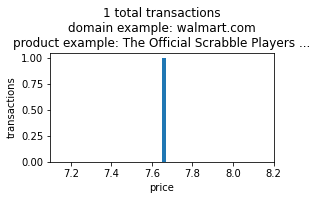

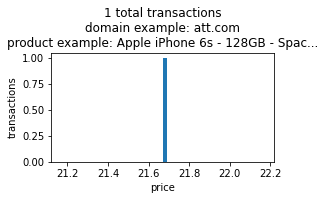

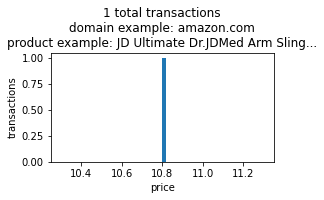

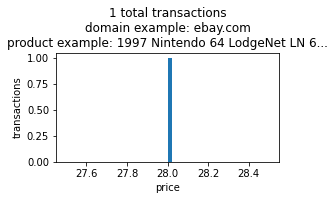

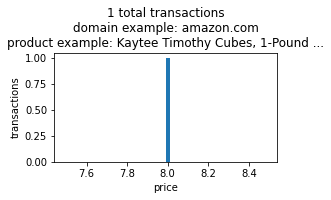

In [345]:
print('prices per categories')
for category in transactions_df['prod_category_id'].value_counts().sort_values(ascending=False).index:
    cat_df = transactions_df[transactions_df.prod_category_id==category]
    cat_total_prices = cat_df['prod_totprice'].dropna()
    # pick out one category product name to help describe category
    prod_name = cat_df['prod_name'].values[0]
    domain_name = cat_df['domain_name'].values[0]
    fig,ax = plt.subplots(1,1,figsize=(4,2))
    ax.hist(cat_total_prices, bins=50)
    ax.set_title('%s total transactions\ndomain example: %s\nproduct example: %s' % (len(cat_df), domain_name, ''.join([prod_name[:30], '...'])))
    ax.set_xlabel('price')
    ax.set_ylabel('transactions')
    plt.show()

## Transactions by machine

### Total transactions per machine

In [367]:
print('%s unique machine ids\n'%transactions_df['machine_id'].nunique())
print('transactions per machine id:')
transaction_per_machine_id = transactions_df['machine_id'].value_counts().rename('transactions')
print(transaction_per_machine_id.describe())
# transaction_per_machine_id

19282 unique machine ids

transactions per machine id:
count    19282.000000
mean         5.970750
std         14.048549
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1311.000000
Name: transactions, dtype: float64


## Transaction categories per machine

- How many product categories per machine?

count    19282.000000
mean         3.085520
std          3.300816
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         41.000000
Name: prod_category_id, dtype: float64

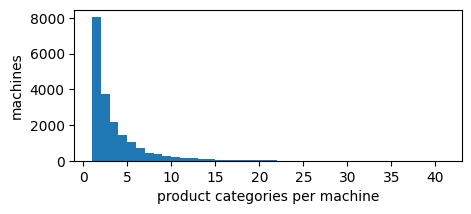

In [361]:
categories_per_machine =transactions_df.groupby('machine_id')['prod_category_id'].nunique()
fig,ax = plt.subplots(1,1,figsize=(5,2), dpi=100)
ax.hist(categories_per_machine, bins=40)
ax.set_ylabel('machines')
ax.set_xlabel('product categories per machine')
categories_per_machine.describe()

How many machines with at least 5 product categories?

count    3809.000000
mean        8.274350
std         4.187639
min         5.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        41.000000
Name: prod_category_id, dtype: float64

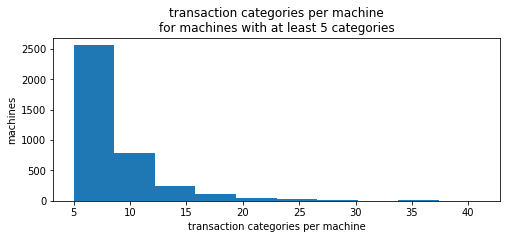

In [378]:
fig,ax = plt.subplots(1,1, figsize=(8,3))
ax.hist(categories_per_machine[categories_per_machine >= 5])
ax.set_title('transaction categories per machine\nfor machines with at least 5 categories')
ax.set_xlabel('transaction categories per machine')
ax.set_ylabel('machines')
categories_per_machine[categories_per_machine >= 5].describe()